# nmi | spring 2024
## homework 09 | IVPs, BVPs
## your name here


### q1 (5 pts) system of equations <b><font color=red>~answer q1 or q2</font></b>


approximate solution to IVP
</br></br>

\begin{align}
  \left\{
    \begin{array}
      && y''' - y' = t \\
      & y(0) = y'(0) = y''(0) = 0 \\
      & t\in [0,1]
    \end{array}
  \right.
\end{align}
</br>

with stepsize $h = 0.25$ if <font color=green>by hand</font> and with $h=0.01$ if <font color=red>by code</font>. true solution is $y(t) = \frac{1}{2}(e^t + e^{-t} - t^2) - 1$.
</br></br>

<font color=orange>use your choice of solver: eulers, explicit trapezoid or RK4.</font>
</br>



#### a) plot true solution and approximation on one appropriately labeled chart.
</br>


##### answer


\begin{align}
  y_1 &= y \\
  y_2 &= y' \\
  y_3 &= y'' \\
  y_1' &= y_2 \\
  y_2' &= y_3 \\
  y_3' &= t + y' = t + y_2
\end{align}
</br>


###### code


,t,w1,y1,w2,y2,w3,y3
0,0.00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
1,0.01,0.000000e+00,4.166678e-10,0.000000,-0.010000,0.000000,-0.999950
2,0.02,0.000000e+00,6.666756e-09,0.000000,-0.019999,0.000100,-0.999800
3,0.03,0.000000e+00,3.375101e-08,0.000001,-0.029995,0.000300,-0.999550
4,0.04,1.000000e-08,1.066724e-07,0.000004,-0.039989,0.000600,-0.999200
...,...,...,...,...,...,...,...
96,0.96,3.416002e-02,3.649468e-02,0.149113,-0.805598,0.490160,-0.502705
97,0.97,3.565115e-02,3.806375e-02,0.154015,-0.810569,0.501251,-0.491486
98,0.98,3.719130e-02,3.968367e-02,0.159027,-0.815427,0.512491,-0.480116
99,0.99,3.878157e-02,4.135558e-02,0.164152,-0.820171,0.523882,-0.468594



global truncation error: 0.00265754946786588



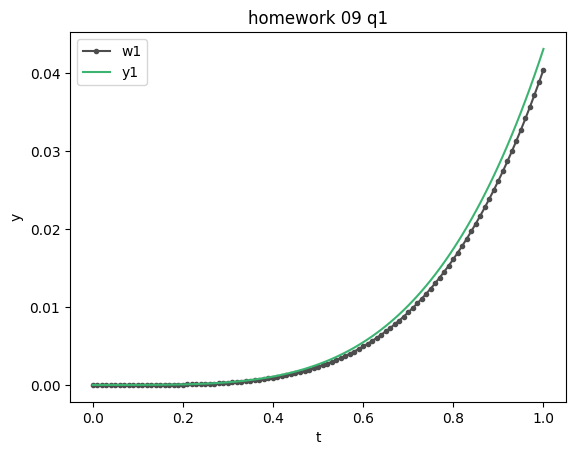

In [1]:
# mode 0603 example 13

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# euler
euler_step = lambda t,y,h,ydot: y + h*ydot(t,y)

# solver = heuns method / explicit trapezoid
trap_step = lambda t,y,h,ydot: y + h*(ydot(t,y) + ydot(t+h,y+h*ydot(t,y)))/2

# f(t,y)
def ydot(at,ay):

  z = np.zeros(ay.shape)
  z[0] = ay[1]
  z[1] = ay[2]
  z[2] = at + ay[1]
  return z

pd.set_option('display.min_rows',0)
pd.set_option('display.max_rows',10)

# actual
y1 = lambda t: (np.exp(t) + np.exp(-t) - pow(t,2))/2 - 1
y2 = lambda t: (np.exp(t) - np.exp(-t) - 4*t)/2
y3 = lambda t: (np.exp(t) + np.exp(-t) - 4)/2
ys = [y1,y2,y3]
n_sys = len(ys)

# interval, h
t = [0.,1.]
h = 0.01
n = int((t[1]-t[0])/h) # [0,n] points

# ic
t1 = t2 = t3 = t[0]
w1 = ic = np.array([0.,0.,0.]) # y0

# ic, dataframe
ds = np.zeros((n+1,1+2*n_sys)) # t,[w,y]*n_sys
ds[0,0] = t1
for j in range(n_sys):
  ds[0,2*j+1] = ic[j] # w
  ds[0,2*j+2] = ic[j] # y

# calc
for i in range(n):
  t2 += h
  ds[i+1,0] = t2
  if True:
    w2 = euler_step(t1,w1,h,ydot)
  else:
    w2 = trap_step(t1,w1,h,ydot)
  for j in range(len(w2)):
    ds[i+1,2*j+1] = w2[j]
    ds[i+1,2*j+2] = ys[j](t2)
  t1 = t2
  w1 = w2

# dataframe column names
nCol = ['t']
for i in range(n_sys):
  nCol.append('w'+str(i+1))
  nCol.append('y'+str(i+1))

# dataframe from datastore
df = pd.DataFrame(data=ds,columns=nCol)
if True: # spreadsheet
  print() # spacer
  display(df)

print(f"\nglobal truncation error: {abs(ds[-1,1]-ds[-1,2])}\n")

if True: # plot
  ax1  = df.plot(x = "t",y="w1",label="w1",color=".3",marker=".")
  ax11 = df.plot(x = "t",y="y1",label="y1",ax=ax1,color="mediumseagreen")
  if False: # nah, just distorts graph area
    ax12 = df.plot(x = "t",y="w2",label="w2",ax=ax1,color=".3",marker="*")
    ax13 = df.plot(x = "t",y="y2",label="y2",ax=ax1,color="xkcd:sky blue")
    ax14 = df.plot(x = "t",y="w3",label="w3",ax=ax1,color=".3",marker="o")
    ax15 = df.plot(x = "t",y="y3",label="y3",ax=ax1,color="cyan")
  ax1.set_title("homework 09 q1")
  ax1.set_xlabel("t")
  ax1.set_ylabel("y")

#### b) display global truncation error at $t=1$.
</br>


### q2 (30 pts) three-body orbit <b><font color=red>~answer q1 or q2</font></b>


<font color=red>this is a code problem and it is a somewhat advanced problem. there will not be a walk-through for this question.</font>
</br>


a three-body figure-eight orbit was discovered by c. moore in 1993. in this configuration, three bodies of equal mass chase one another along a single figure-eight loop. $m_1 = m_2 = m_3 = 1$ and gravity $g = 1$.
</br>


#### a) (20 pts) adapt code from lecture example of subsection 6.3.3 to plot trajectory.


initial conditions
</br></br>

\begin{align}
  (x_1,y_1) &= (-0.970,0.243) \\
  (x_1',y_1') &= (-0.466,-0.433) \\
  (x_2,y_2) &= (-x_1,-y_1) \\
  (x_2',y_2') &= (x_1',y_1') \\
  (x_3,y_3) &= (0,0) \\
  (x_3',y_3') &= (-2x_1',-2y_1'). \\
\end{align}
</br>


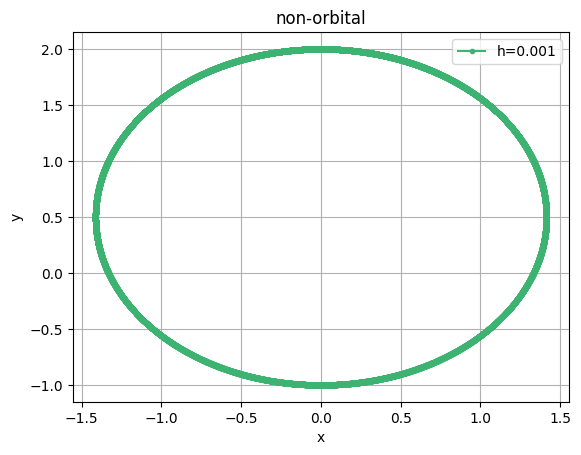

In [ ]:
# 6.3.3 : not even close to outer space

#from astropy.constants import M_earth,g0 as EARTH,GRAVITY # metric
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# euler
euler_step = lambda t,x,h,ydot: x + h*ydot(t,x)

# trapezoid
def trap_step(t,x,h,ydot):
  z1 = ydot(t,x)
  g = x+h*z1
  z2 = ydot(t+h,g)
  y = x+h*(z1+z2)/2
  return y

# f(t,y)
def ydot(at,ax):
  #m2,g,px2,py2 = EARTH,GRAVITY,0,0 # and the center of the earth
  m2,g,px2,py2 = 3.,1.,0.,0. # sauer, 2nd ed, p329
  z = np.zeros(ax.shape)

  px1,py1 = ax[0],ax[2] # position
  vx1,vy1 = ax[1],ax[3] # velocity

  z[0],z[2] = vx1,vy1
  r = math.sqrt(pow((px2-px1),2) + pow((py2-py1),2))
  m = m2*g/pow(r,3)
  if False:
    print(f"m2 {m2}, g {g}, r {r}, m {m}")
  z[1],z[3] = m*(px2-px1),m*(py2-py1)

  return z

# interval, h
t = [0.,100.]
#n,p = 10000,100 # evaluate n, plot p # tmi!
n,p = 100000,20000 # evaluate n, plot p
h = (t[1]-t[0])/n

# ic
t1 = t2 = t[0]
y1 = y2 = ic = np.array([0.,1.,2.,0.])

# ic, dataframe
ds = np.zeros((p+1,1+len(ic)))
ds[0,1:len(y1)+1] = y1

# calc
for k in range(p):
  for i in range(round(n/p)): # round = lols
    t2 += h
    #y2 = euler_step(t1,y1,h,ydot)
    y2 = trap_step(t1,y1,h,ydot)
    t1,y1 = t2,y2
  ds[k+1,0] = t2
  ds[k+1,1:len(y2)+1] = y2

# plot
nCol = ['t','x',"x'",'y',"y'"] # dataframe column names
df = pd.DataFrame(data=ds,columns=nCol)

if False: # spreadsheet
  display(df)

if True: # plot
  ax1  = df.plot(x = "x",y="y",label="h="+str(h),color="mediumseagreen",marker=".")
  #ax1a = df.plot(x = "x'",y="y'",label="$v_{wtf}$",ax=ax1,color="xkcd:sky blue",marker="*")
  ax1.set_title("non-orbital")
  ax1.set_xlabel("x")
  ax1.set_ylabel("y")
  ax1.grid('on',which='major',axis='x')
  ax1.grid('on',which='major',axis='y')


#### b) (10 pts) test sensitivity of trajectories to small changes in initial conditions.



change $x_3'$ by $+10^{-k}, 1\le k\le 5$. for each $k$ does figure-eight pattern persist?
</br>

### q3. (5 pts) BVP


show $y = e^{t^2}$ is solution for BVP
</br></br>

\begin{align}
  \left\{
    \begin{array}
      && y'' = (2+4t^2)y \\
      & y(0) = 1 \\
      & y(1) = e.
    \end{array}
  \right.
\end{align}
</br>


### q4. (25 pts) shooting method


<b><font color=red>this is a code problem.</font></b>
</br></br>

apply shooting method to q3 BVP.
</br>


#### a) (20 pts) find interval $[s_0,s_1]$ that brackets solution.


###### code




0701 c3.b) iteration 20, s = [0.000101089,0.000102043]



,y_act,t1,y1,y1',t2,y2,y2'
0,1.00000000,0.00000000,1.00000000,0.00010109,0.00000000,1.00000000,0.00010204
1,1.00000031,0.00055231,1.00000036,0.00120571,0.00055283,1.00000036,0.00120770
2,1.00003698,0.00607544,1.00003753,0.01225241,0.00608114,1.00003760,0.01226477
3,1.00377266,0.06130668,1.00377179,0.12317653,0.06136419,1.00377893,0.12329383
4,1.27239392,0.49067819,1.27229737,1.24861349,0.49081575,1.27246970,1.24913339
5,2.71828183,1.00000000,2.71828056,5.43872731,1.00000000,2.71828248,5.43872863


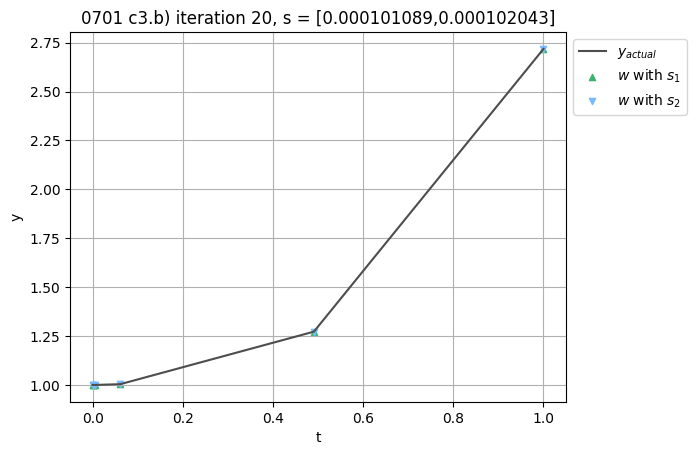

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

def main():

  # solution
  yact = lambda t: np.exp(pow(t,2))

  # bvp
  bv = [1,np.e]
  tt = [0,1]

  # ivp: f(t,y) = [y',y'']
  def ydot(t,y):
    dy = np.zeros_like(y)
    dy[0] = y[1] # y'
    dy[1] = (2 + 4*pow(t,2))*y[0] # y''
    return dy

  ic = np.array([0,bv[0]]) # zero is placeholder for s* - ie, [s*,bv[0]]
  tol = 1e-8 # error bound

  # bisection sorry lol
  s1 = -0.5 # this is the  left endpoint "a" of the interval [a,b]
  s2 = +0.5 # this is the right endpoint "b" of the interval [a,b]
  imax = 20 # max attempts at finding s* within interval [s1,s2]
  i = 0
  while (abs((s2-s1)/2) > tol) and (i<imax):
    ic = [bv[0],s1]
    sol1 = sp.integrate.solve_ivp(fun=ydot,t_span=tt,y0=ic)
    ic = [bv[0],s2]
    sol2 = sp.integrate.solve_ivp(ydot,tt,ic)

    size1 = sol1.t.size
    size2 = sol2.t.size
    err1 = bv[1] - sol1.y[0][size1-1] # error at s1 ~ a
    err2 = bv[1] - sol2.y[0][size2-1] # error at s2 ~ b
    if err1*err2 > 0 :
      print("choose different s1,s2")
      break
    #err = abs(err2 - err1) # deciding on root s stabilty over f(s)

    sc = (s1+s2)/2 # midpoint between of [s1,s2] ~ [a,b]
    ic = [bv[0],sc]
    solc = sp.integrate.solve_ivp(fun=ydot,t_span=tt,y0=ic)
    sizec = solc.t.size
    errc = bv[1] - solc.y[0][sizec-1] # error at c
    if err1*errc < 0 :
      s2 = sc
      sol2 = solc
      size2 = sizec
      err2 = errc
    else:
      s1 = sc
      sol1 = solc
      size1 = sizec
      err1 = errc

    i += 1

  # dataframe, save last brackets
  ds = np.empty((max(size1,size2),1+3*2))
  ds[:] = np.nan # matplotlib ignores nan = good
  if size1 > size2:
    ds[0:size1,0] = yact(sol1.t)
    cx = "t1"
  else:
    ds[0:size2,0] = yact(sol2.t)
    cx = "t2"
  ds[0:size1,1] = sol1.t
  ds[0:size1,2] = sol1.y[0]
  ds[0:size1,3] = sol1.y[1]
  ds[0:size2,4] = sol2.t
  ds[0:size2,5] = sol2.y[0]
  ds[0:size2,6] = sol2.y[1]

  # dataframe, print some
  s_title = "0701 c3.b) iteration " + str(i) + ", s = [" + "{:10.9f}".format(s1) +"," + "{:10.9f}".format(s2) + "]"
  print(f"\n\n"+s_title+"\n") # bc pf.style.set_caption() bites in colab atm
  pd.set_option("display.max_rows",10)
  pd.set_option("display.precision",8)
  df = pd.DataFrame(data=ds,columns=["y_act","t1","y1","y1'","t2","y2","y2'"])
  if True: # spreadsheet
    display(df)
    print() # spacer

  # plot
  if True: # plot
    ax1  = df.plot(x=cx,y="y_act",label="$y_{actual}$",color="0.3")
    ax12 = df.plot(x="t2",y="y1",label="$w$ with $s_1$",ax=ax1,color="mediumseagreen",marker="^",kind="scatter")
    ax11 = df.plot(x="t2",y="y2",label="$w$ with $s_2$",ax=ax1,color="xkcd:sky blue",marker="v",kind="scatter")
    ax1.set_title(s_title)
    ax1.set_xlabel("t")
    ax1.set_ylabel("y")
    #ax1.axis((.2,.8,1,2)) # narrow visible range of results (x_min,x_max,y_min,y_max)
    ax1.grid('on',which='major',axis='x')
    ax1.grid('on',which='major',axis='y')

    plt.legend(bbox_to_anchor=(1,1))
    plt.show()

if __name__ == "__main__":
  main()



#### b) (5 pts) plot approximate solution and true solution on same graph.
